# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


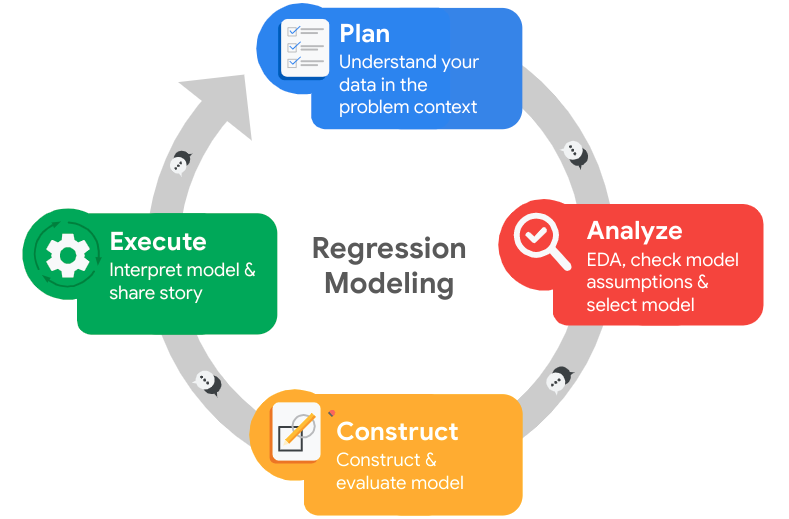

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [23]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [9]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [7]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
### YOUR CODE HERE ###
print(df0.columns.tolist())



['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [ ]:
# Rename columns as needed
### YOUR CODE HERE ###


# Display all column names after the update
### YOUR CODE HERE ###


### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values
### YOUR CODE HERE ###
missing_values = df0.isnull().sum()

print(missing_values)


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
### YOUR CODE HERE ###
duplicates = df0.duplicated()

print("Duplicate rows:")
print(df0[duplicates])

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")


Duplicate rows:
       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0     1   
1317                   

In [14]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicate_rows = df0[duplicates]

print("Some duplicate rows:")
print(duplicate_rows.head())  # Displaying the first few duplicate rows


Some duplicate rows:
      satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  Work_accident  left  \
396                    139                   3              0     1   
866                    128                   3              0     1   
1317                   127                   3              0     1   
1368                   132                   3              0     1   
1461                   142                   3              0     1   

      promotion_last_5years  Department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       s

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###


### Check outliers

Check for outliers in the data.

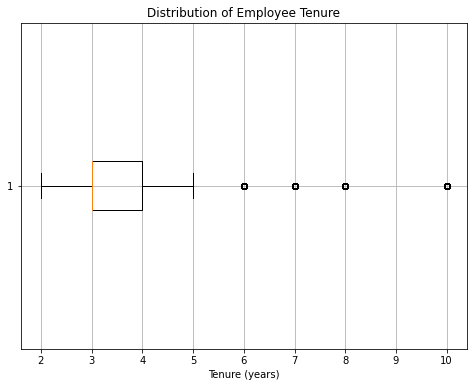

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

# Extract the 'time_spend_company' column
tenure_data = df0['time_spend_company']

# Create a boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(tenure_data, vert=False)  # vert=False for horizontal boxplot
plt.xlabel('Tenure (years)')
plt.title('Distribution of Employee Tenure')
plt.grid(True)
plt.show()



In [18]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# Calculate IQR (Interquartile Range)
Q1 = tenure_data.quantile(0.25)
Q3 = tenure_data.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows containing outliers
outliers = df0[(tenure_data < lower_bound) | (tenure_data > upper_bound)]

# Count the number of rows with outliers
num_outliers = len(outliers)

print(f"Number of rows containing outliers in 'time_spend_company': {num_outliers}")



Number of rows containing outliers in 'time_spend_company': 1282


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [19]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
# Count the number of people who left vs. stayed
num_left = df0[df0['left'] == 1].shape[0]
num_stayed = df0[df0['left'] == 0].shape[0]

print(f"Number of people who left: {num_left}")
print(f"Number of people who stayed: {num_stayed}")

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
# Calculate percentages
total_employees = df0.shape[0]
percent_left = (num_left / total_employees) * 100
percent_stayed = (num_stayed / total_employees) * 100

print(f"Percentage of people who left: {percent_left:.2f}%")
print(f"Percentage of people who stayed: {percent_stayed:.2f}%")

Number of people who left: 3571
Number of people who stayed: 11428
Percentage of people who left: 23.81%
Percentage of people who stayed: 76.19%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

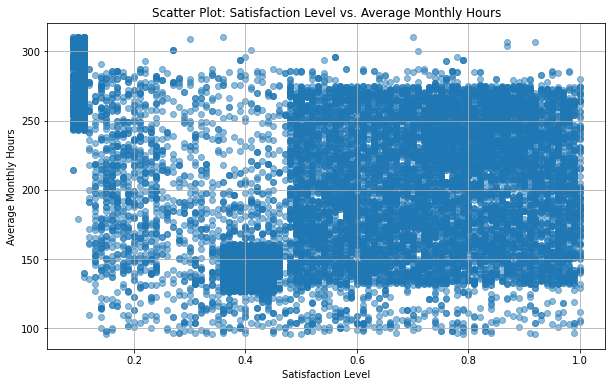

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# Scatter plot: satisfaction_level vs. average_monthly_hours
plt.figure(figsize=(10, 6))
plt.scatter(df0['satisfaction_level'], df0['average_montly_hours'], alpha=0.5)
plt.title('Scatter Plot: Satisfaction Level vs. Average Monthly Hours')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.grid(True)
plt.show()


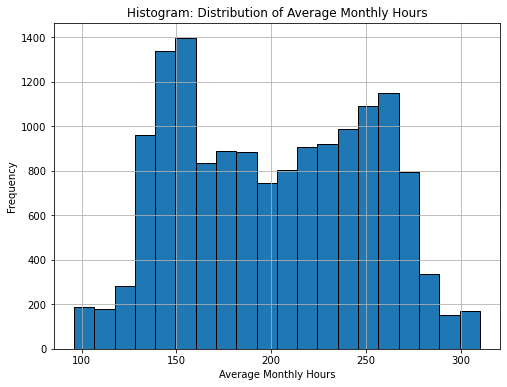

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
# Histogram: average_montly_hours
plt.figure(figsize=(8, 6))
plt.hist(df0['average_montly_hours'], bins=20, edgecolor='black')
plt.title('Histogram: Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


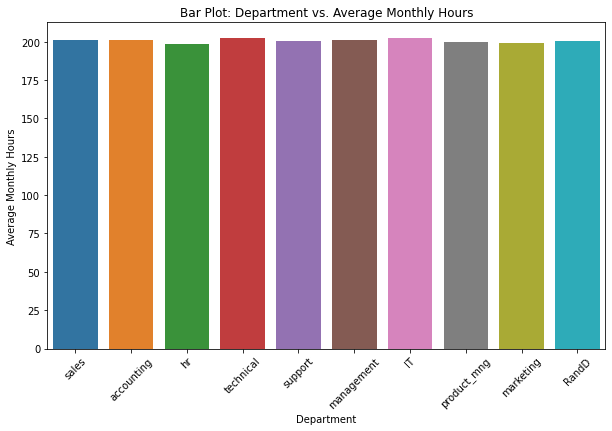

In [33]:
# Create a plot as needed
### YOUR CODE HERE ###
# Bar plot: department vs. average_montly_hours
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='average_montly_hours', data=df0, ci=None)
plt.title('Bar Plot: Department vs. Average Monthly Hours')
plt.xlabel('Department')
plt.ylabel('Average Monthly Hours')
plt.xticks(rotation=45)
plt.show()


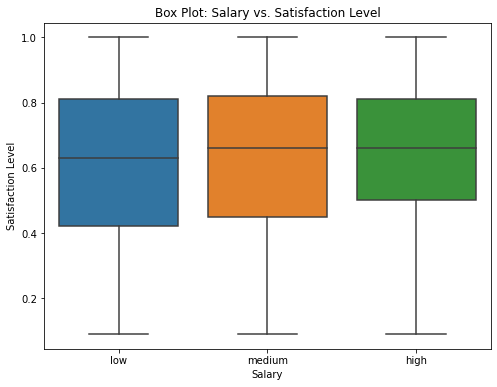

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
# Box plot: salary vs. satisfaction_level
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary', y='satisfaction_level', data=df0)
plt.title('Box Plot: Salary vs. Satisfaction Level')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')
plt.show()


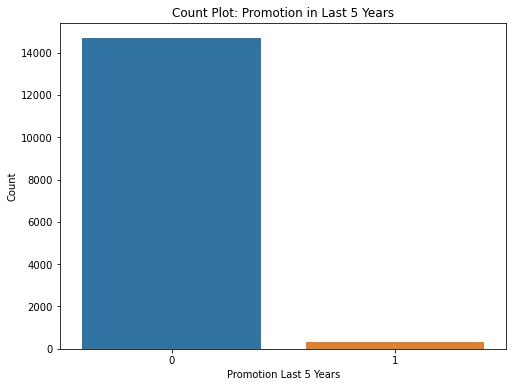

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
# Count plot: promotion_last_5years
plt.figure(figsize=(8, 6))
sns.countplot(x='promotion_last_5years', data=df0)
plt.title('Count Plot: Promotion in Last 5 Years')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Count')
plt.show()




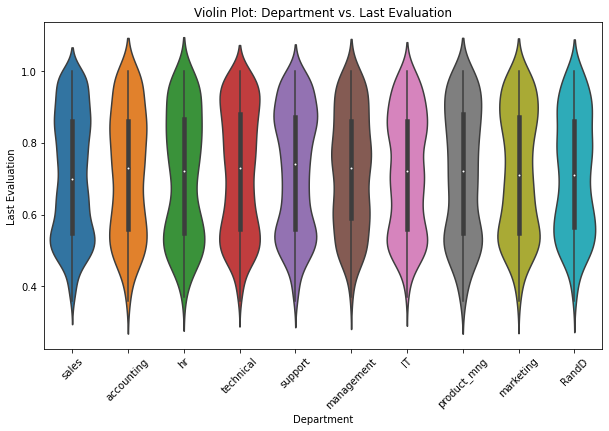

In [34]:
# Create a plot as needed
### YOUR CODE HERE ###
# Violin plot: department vs. last_evaluation
plt.figure(figsize=(10, 6))
sns.violinplot(x='Department', y='last_evaluation', data=df0)
plt.title('Violin Plot: Department vs. Last Evaluation')
plt.xlabel('Department')
plt.ylabel('Last Evaluation')
plt.xticks(rotation=45)
plt.show()



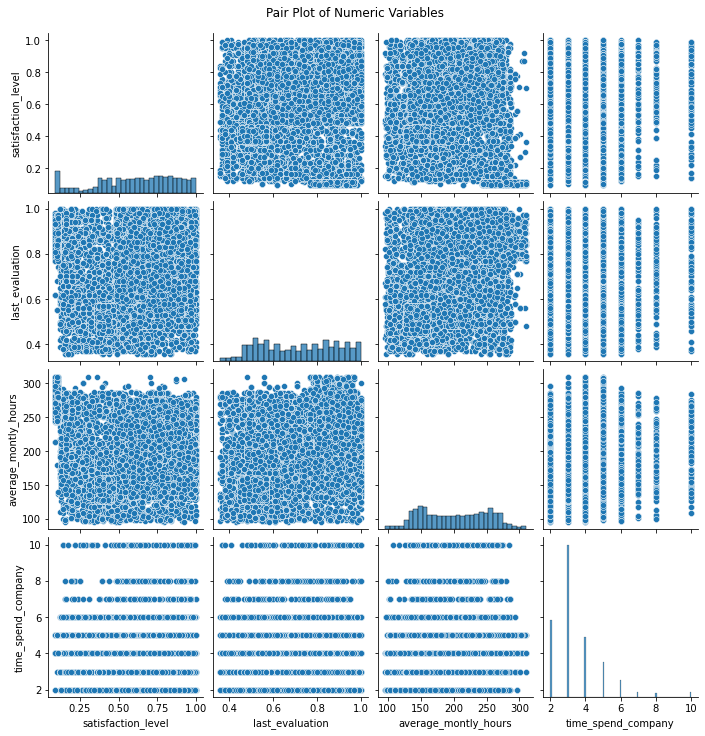

In [31]:
# Create a plot as needed
### YOUR CODE HERE ###
# Pair plot: numeric variables
sns.pairplot(df0[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()



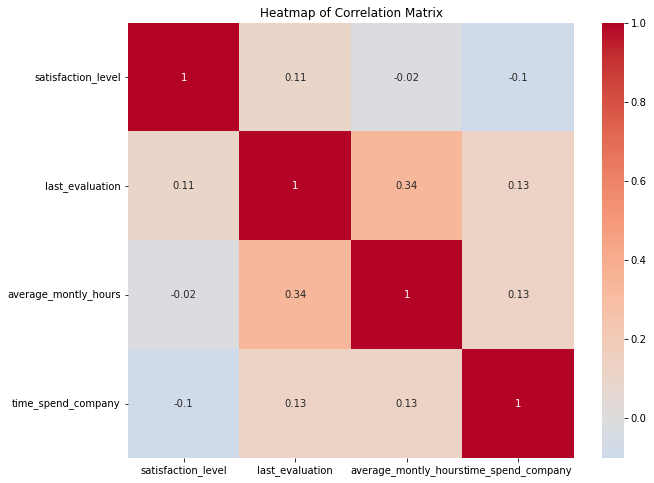

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###
# Heatmap: correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df0[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()



### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [36]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm


In [38]:
# Load the dataset
# Select independent variables and the dependent variable
X = df0[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']]
y = df0['left']

# Add intercept for statsmodels
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Fit logistic regression model using sklearn
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predict on test set
y_pred = model.predict(X_test)


Coefficients: [[-2.43405796e-02 -3.74528092e+00  1.54167575e-02  1.93065597e-03
   1.64832560e-01]]
Intercept: [-0.03371335]


In [40]:
# Fit logistic regression model using statsmodels for detailed analysis
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

# Check for multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif)


Optimization terminated successfully.
         Current function value: 0.465398
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                11999
Model:                          Logit   Df Residuals:                    11994
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1533
Time:                        05:15:55   Log-Likelihood:                -5584.3
converged:                       True   LL-Null:                       -6595.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0712      0.130     -0.548      0.583      -0.326       0.183

In [41]:
# Evaluate model performance using sklearn metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2079  215]
 [ 539  167]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.44      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



**Based on the provided model performance metrics, let's interpret the results and outline actionable steps for stakeholders based on the logistic regression model's predictions of employee turnover (left).

## Interpretation of Model Performance

**Coefficients:**

- Intercept: -0.0337

**Coefficients:**
- satisfaction_level: -0.0243
- last_evaluation: -3.7453
- average_montly_hours: 0.0154
- time_spend_company: 0.0019
- Interpreting the coefficients:

- satisfaction_level: A decrease in satisfaction level is associated with a lower likelihood of an employee leaving.

- last_evaluation: Higher values indicate a lower likelihood of leaving, though the coefficient is negative and large, suggesting potential issues like overfitting or multicollinearity.

- average_monthly_hours: Slight positive association with leaving, implying that employees with higher average monthly hours might be more likely to leave.

- time_spend_company: A slight positive association, indicating longer-tenured employees might have a slightly higher likelihood of leaving.


**Confusion Matrix:**

- True Positives (TP): 167 (Employees correctly predicted as leaving)
- False Positives (FP): 215 (Employees incorrectly predicted as leaving)
- True Negatives (TN): 2079 (Employees correctly predicted as staying)
- False Negatives (FN): 539 (Employees incorrectly predicted as staying)

**Classification Report:**

- Precision: Precision for class 1 (employees who left) is 0.44, indicating that when the model predicts an employee will leave, it is correct 44% of the time.
- Recall: Recall for class 1 is 0.24, meaning the model correctly identifies 24% of all employees who actually left.
- F1-score: The harmonic mean of precision and recall is 0.31 for class 1, which balances both metrics.

**Actionable Steps for Stakeholders**

Based on these results, here are actionable steps stakeholders can take:

**Focus on Satisfaction Levels:**

Encourage initiatives to improve employee satisfaction levels, as lower satisfaction is associated with higher turnover. Conduct regular surveys to understand employee sentiments and address issues proactively.

**Review Evaluation Processes:**

Investigate the findings related to last_evaluation, which suggests a significant negative impact on turnover prediction. Ensure evaluation processes are fair and aligned with employee development goals to mitigate potential biases or inconsistencies.

**Manage Workload:**

Monitor employees with high average_monthly_hours closely. Consider workload adjustments, flexible working hours, or workload balancing strategies to prevent burnout and improve retention.

**Retention Strategies for Tenured Employees:**

Develop targeted retention programs for longer-tenured employees (time_spend_company). Engage these employees with career development opportunities, recognition programs, and mentorship initiatives to foster loyalty and commitment.

**Monitor Model Performance:**

Continuously evaluate the model's performance metrics (accuracy, precision, recall) over time. Update the model with new data and refine it as necessary to ensure it remains effective in predicting employee turnover.

**Feedback and Communication:**

Foster a culture of open communication and feedback to address concerns raised by the model's insights. Ensure stakeholders understand the limitations and assumptions of the model to make informed decisions.


By implementing these steps, stakeholders can leverage the insights provided by the model to proactively manage employee turnover, improve organizational retention strategies, and foster a positive work environment conducive to employee satisfaction and engagement. Regular reviews and adjustments based on feedback and new data will ensure sustained effectiveness in mitigating turnover risks.




✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

### Conclusion

Based on the logistic regression model results and performance metrics, we can draw the following conclusions:

1. **Key Predictors of Employee Turnover**:
   - **Satisfaction Level**: Employees with lower satisfaction levels are more likely to leave the company.
   - **Last Evaluation**: Higher evaluations significantly reduce the likelihood of turnover, though caution is warranted due to the large negative coefficient observed.
   - **Average Monthly Hours**: Longer working hours slightly increase the likelihood of turnover.
   - **Time Spent in Company**: Longer tenure also shows a slight increase in the likelihood of turnover.

2. **Model Performance**:
   - The model demonstrates moderate performance with an overall accuracy of 75%.
   - Precision for predicting employees who left is 44%, indicating that the model correctly identifies employees likely to leave 44% of the time.
   - Recall for employees who left is 24%, meaning the model captures 24% of all employees who actually left.

### Recommendations

Based on these findings, here are actionable recommendations to address turnover and improve retention:

1. **Employee Satisfaction and Engagement**:
   - Implement regular surveys and feedback mechanisms to gauge employee satisfaction and address concerns promptly.
   - Develop initiatives to enhance workplace culture, promote work-life balance, and recognize employee contributions.

2. **Performance Evaluation and Career Development**:
   - Review and refine performance evaluation processes to ensure fairness and transparency.
   - Provide opportunities for skill development, career growth, and advancement to retain high-performing employees.

3. **Workload Management**:
   - Monitor workload distribution and employee hours to prevent burnout and promote productivity.
   - Consider flexible work arrangements or workload adjustments to support employee well-being.

4. **Retention Programs**:
   - Develop targeted retention strategies tailored to different employee segments, especially those identified as at-risk based on model predictions.
   - Offer competitive compensation packages, benefits, and professional development opportunities to foster loyalty and commitment.

### Next Steps

1. **Implementation Plan**:
   - Develop an implementation timeline for recommended strategies, assigning responsibilities and setting measurable goals.
   - Establish key performance indicators (KPIs) to track the effectiveness of interventions over time.

2. **Continuous Monitoring and Evaluation**:
   - Monitor turnover rates and employee satisfaction metrics regularly to assess the impact of implemented strategies.
   - Use feedback loops to refine and adjust initiatives based on real-time data and employee feedback.

3. **Further Analysis and Model Refinement**:
   - Conduct further analysis to explore additional predictors or interactions that may influence turnover.
   - Consider refining the model by addressing potential issues such as overfitting or multicollinearity observed in certain variables.

4. **Stakeholder Engagement and Communication**:
   - Communicate findings, recommendations, and progress updates with stakeholders at all levels of the organization.
   - Foster a collaborative approach to ensure buy-in and support for retention initiatives across departments.

By focusing on these recommendations and next steps, the organization can proactively manage turnover, enhance employee retention efforts, and create a positive work environment conducive to long-term employee satisfaction and organizational success. Regular evaluation and adjustment of strategies will help maintain alignment with business goals and adapt to evolving workforce dynamics.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.